In [14]:
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import pandas as pd

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  


In [15]:
# Libraries needed for the tutorial

import pandas as pd
import requests
import io
    
# Downloading the csv file from your GitHub account

url = "https://raw.githubusercontent.com/caydenw21/BloomRadius/main/Week1Survey.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
surveydf = pd.read_csv(io.StringIO(download.decode('utf-8')))

url = "https://raw.githubusercontent.com/caydenw21/BloomRadius/main/plantedSeeds.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

seeds = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [17]:
seedChallenges = surveydf[['if I remembered to plant seeds', 'if I thought practicing would positively impact my life', 'if I felt more comfortable trying new things', 'if the seed recommendations were more personalized', 'if the planting process was easier', 'if I could better identify real-life seed planting opportunities']]
seedChallenges = seedChallenges.rename(columns={seedChallenges.columns[0]:'Forgetting', seedChallenges.columns[1]:'Perceived Impact', seedChallenges.columns[2]:'Fear of Trying', seedChallenges.columns[3]:'Lack of Personalization', seedChallenges.columns[4]:'Planting Proccess', seedChallenges.columns[5]:'Seed Oppurtunities'})

In [19]:
x1 = seedChallenges['Forgetting'].value_counts().sort_index()
x2 = seedChallenges['Perceived Impact'].value_counts().sort_index()
x3 = seedChallenges['Fear of Trying'].value_counts(dropna = False).sort_index()
x4 = seedChallenges['Lack of Personalization'].value_counts().sort_index()
x5 = seedChallenges['Planting Proccess'].value_counts().sort_index()
x6 = seedChallenges['Lack of Personalization'].value_counts().sort_index()
pieces = [x1, x2, x3, x4, x5, x6]
df_value_counts = pd.concat(pieces, axis=1)
df_value_counts['Fear of Trying'] = df_value_counts['Fear of Trying'].fillna(0).astype('int')
df_value_counts.iloc[0, :]

Forgetting                 9
Perceived Impact           2
Fear of Trying             0
Lack of Personalization    1
Planting Proccess          1
Lack of Personalization    1
Name: 1, dtype: int64

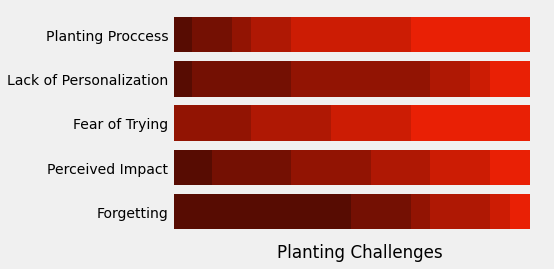

In [20]:
row0 = df_value_counts.iloc[0, :]/18
row1 = df_value_counts.iloc[1, :]/18
row2 = df_value_counts.iloc[2, :]/18
row3 = df_value_counts.iloc[3, :]/18
row4 = df_value_counts.iloc[4, :]/18
row5 = df_value_counts.iloc[5, :]/18

fig, ax = plots.subplots()
plots.barh(df_value_counts.columns, row0, color='#570C02')
plots.barh(df_value_counts.columns, row1, left=row0, color='#741003')
plots.barh(df_value_counts.columns, row2, left=row0+row1, color='#921403')
plots.barh(df_value_counts.columns, row3, left=row0+row1+row2, color='#AF1804')
plots.barh(df_value_counts.columns, row4, left=row0+row1+row2+row3, color='#CC1C04')
plots.barh(df_value_counts.columns, row5, left=row0+row1+row2+row3+row4, color='#E92005')
plots.xlabel('Planting Challenges')
ax.tick_params(axis='both', which='major', bottom=False, labelbottom=False, grid_alpha=0)

Text(0.0, 1.0, 'Seed Attributes')

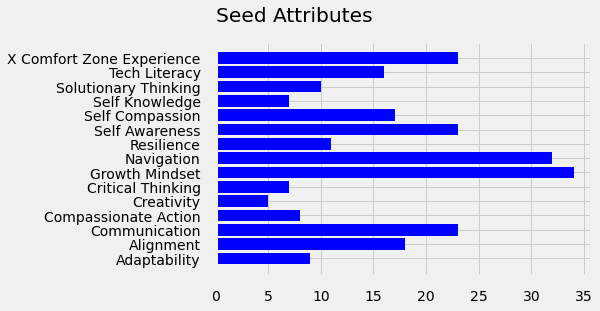

In [21]:
fig, ax = plots.subplots()
attributeCount = seeds['Attribute'].value_counts().sort_index()
plots.barh(attributeCount.index, attributeCount.values, color='b')
ax.tick_params(axis='both', which='major', pad=15)
plots.title('Seed Attributes', loc='left', pad=20)

Text(0.5, 1.0, 'Categories')

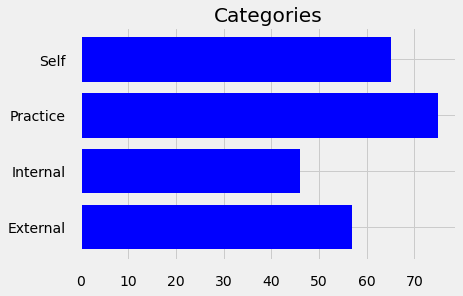

In [22]:
fig, ax = plots.subplots()
attributeCount = seeds['Category'].value_counts().sort_index()
plots.barh(attributeCount.index, attributeCount.values, color='b')
ax.tick_params(axis='both', which='major', pad=15)
plots.title('Categories', pad=5)